## Step 1: Get the data from online

In [94]:
from pathlib import Path
from urllib.request import urlretrieve # retrieve a url to a location in disk
import pandas as pd
import tarfile


def load_data():
    dataset_path=Path('dataset_recreate/housing.taz')
    csv_path=Path('dataset_recreate/housing/housing.csv')
    if not dataset_path.is_file():
        Path('dataset_recreate').mkdir(parents=True, exist_ok=True)
        urlretrieve("https://github.com/ageron/data/raw/main/housing.tgz", dataset_path)
        with tarfile.open(dataset_path) as housing_tgz:
            housing_tgz.extractall(path='dataset_recreate')
    return pd.read_csv(csv_path)
    
    

housing=load_data()  
    

In [95]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 2: Quick Glance at the data

In [96]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


What we find out:
- 10 features, 20640 entries
- ocean_proximity is the only non-numerical value
- total_bedrooms has null values   

In [97]:
# Explore the object ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Five different categories of the housing in terms of ocean_proximity

In [98]:
# Check other statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Findings:
- median_income is divided by 1000
- median_house_value and house_median_age are capped
- total_rooms, total_bedrooms, population as well as households have long tails

In [99]:
# Create a method to save the firgures generated in the code
import matplotlib.pyplot as plt
image_dir_recreate=Path('images_recreate')
Path('images_recreate').mkdir(exist_ok=True, parents=True)

def save_figures(imageId, figure_expension='png'):
    path=image_dir_recreate/f'{imageId}.{figure_expension}'
    plt.savefig(path)

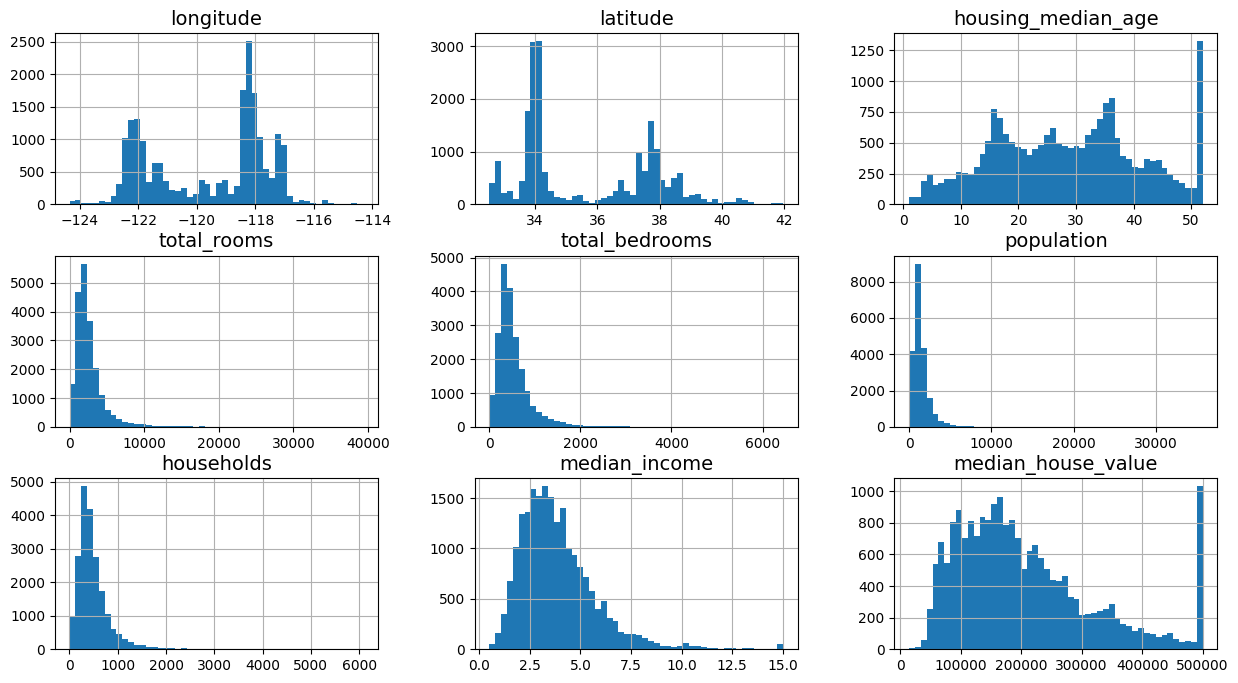

In [100]:
# Create a histogram to show the numerical values
import matplotlib.pyplot as plt
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(15, 8))
save_figures("attribute_histogram_plots")
plt.show()


## Train / Test data split

There are multiple ways to split Data into Train data set and Test data set
1. 简单随机样本 (Simple random sample)
- Write a function to divide train and test data randomly but remeber to set the seed to make sure the same random data are always generated each time the program is running
- Using methods from sklearn
- If the data is updated then the above approach would not work, you need to hash the identifer of the test entries to make sure the train and test data will not be mixed after the data get updated.
 
2. 分层抽样 (Stratified sampling)
- Figure out how to make the strata
- Then split the data based on the strata category

In [101]:
# Simple random sample
import numpy as np
def shuffle_and_split(data, test_ratio=0.2):
    np.random.seed(42)
    randome_indices=np.random.permutation(len(data))
    test_data_size=int(len(data)*test_ratio)
    test_set_indices=randome_indices[0:test_data_size]
    train_set_indices=randome_indices[test_data_size:]
    test_data=data.iloc[test_set_indices]
    train_data=data.iloc[train_set_indices]
    return train_data, test_data
    

In [102]:
housing_train, housing_test=shuffle_and_split(housing, test_ratio=0.2)
housing_train.shape

(16512, 10)

In [103]:
housing_test.shape

(4128, 10)

In [104]:
# Use sklearn to achieve the above code
from sklearn.model_selection import train_test_split

train_data, test_data=train_test_split(housing, test_size=0.2, random_state=42)


In [105]:
train_data.shape

(16512, 10)

In [106]:
test_data.shape

(4128, 10)

In [107]:
## Using Hashing of identifiers to make no mix up between test and train data
from zlib import crc32
def is_in_test_set(id, test_ratio):
    return crc32(np.int64(id))<test_ratio*2**32



def train_test_split_using_hash(data, test_ratio, identifier_column):
    identifier=data[identifier_column]
    in_test_set=identifier.apply(lambda id : is_in_test_set(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [108]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = train_test_split_using_hash(housing_with_id, 0.2, "index")

In [109]:
train_set.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [110]:
test_set.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [127]:
# Other ways of hash, using stable features like longitude and latitude
housing['identifier']=housing['longitude']*1000+housing['latitude']
train_set, test_set=train_test_split_using_hash(housing, 0.2, 'identifier')


In [128]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [129]:
train_set.shape

(16322, 11)

In [130]:
test_set.shape

(4318, 11)

However randome sample is not always accurate.
e.g. To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.


In [131]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample
# 二项分布 (Binomial distribution)
# A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929909


In [134]:
# Stratified sampling based on income category
housing['income_category']=pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

train_set, test_set=train_test_split(housing, random_state=42, test_size=0.2, stratify=housing['income_category'])

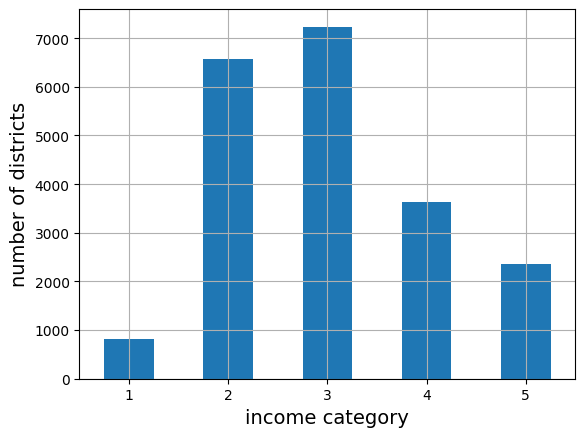

In [147]:
housing['income_category'].value_counts().sort_index().plot.bar(grid=True, rot=0)# rot meaning rotation
plt.xlabel('income category')
plt.ylabel('number of districts')
save_figures('housing_income_cat_bar_plot')
plt.show()